In [16]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import PIL

In [17]:
def awgn(signal, snr):
    db_signal = 10 * np.log10(np.mean(signal ** 2)) 
    db_noise = db_signal - snr
    noise_power = 10 ** (db_noise / 10)
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal)) 
    return signal + noise

In [18]:
images = ['beyonce.jpg', 'einstein.jpg', 'marie-curie.jpg', 'michael-jackson.jpg', 'queen.jpg']
inputs = np.empty((len(images), 4096))
inputs_norm = np.empty((len(images), 4096))

image_index = 0
for image in images:
    photo = PIL.Image.open('./pictures/' + image)
    photo_grey = np.asarray(photo.convert("L")).reshape(1, -1)
    inputs[image_index] = photo_grey
    inputs_norm[image_index] = sklearn.preprocessing.normalize(photo_grey)
    image_index = image_index + 1

In [19]:
weights_hebb = np.dot(inputs.transpose(), inputs_norm)

In [20]:
inputs_square = np.dot(inputs, inputs.transpose())
inverse_inputs_square = np.linalg.inv(inputs_square)

pseudo_inverse = np.dot(inputs.transpose(), inverse_inputs_square)

weights_pseudo = np.dot(pseudo_inverse, inputs)

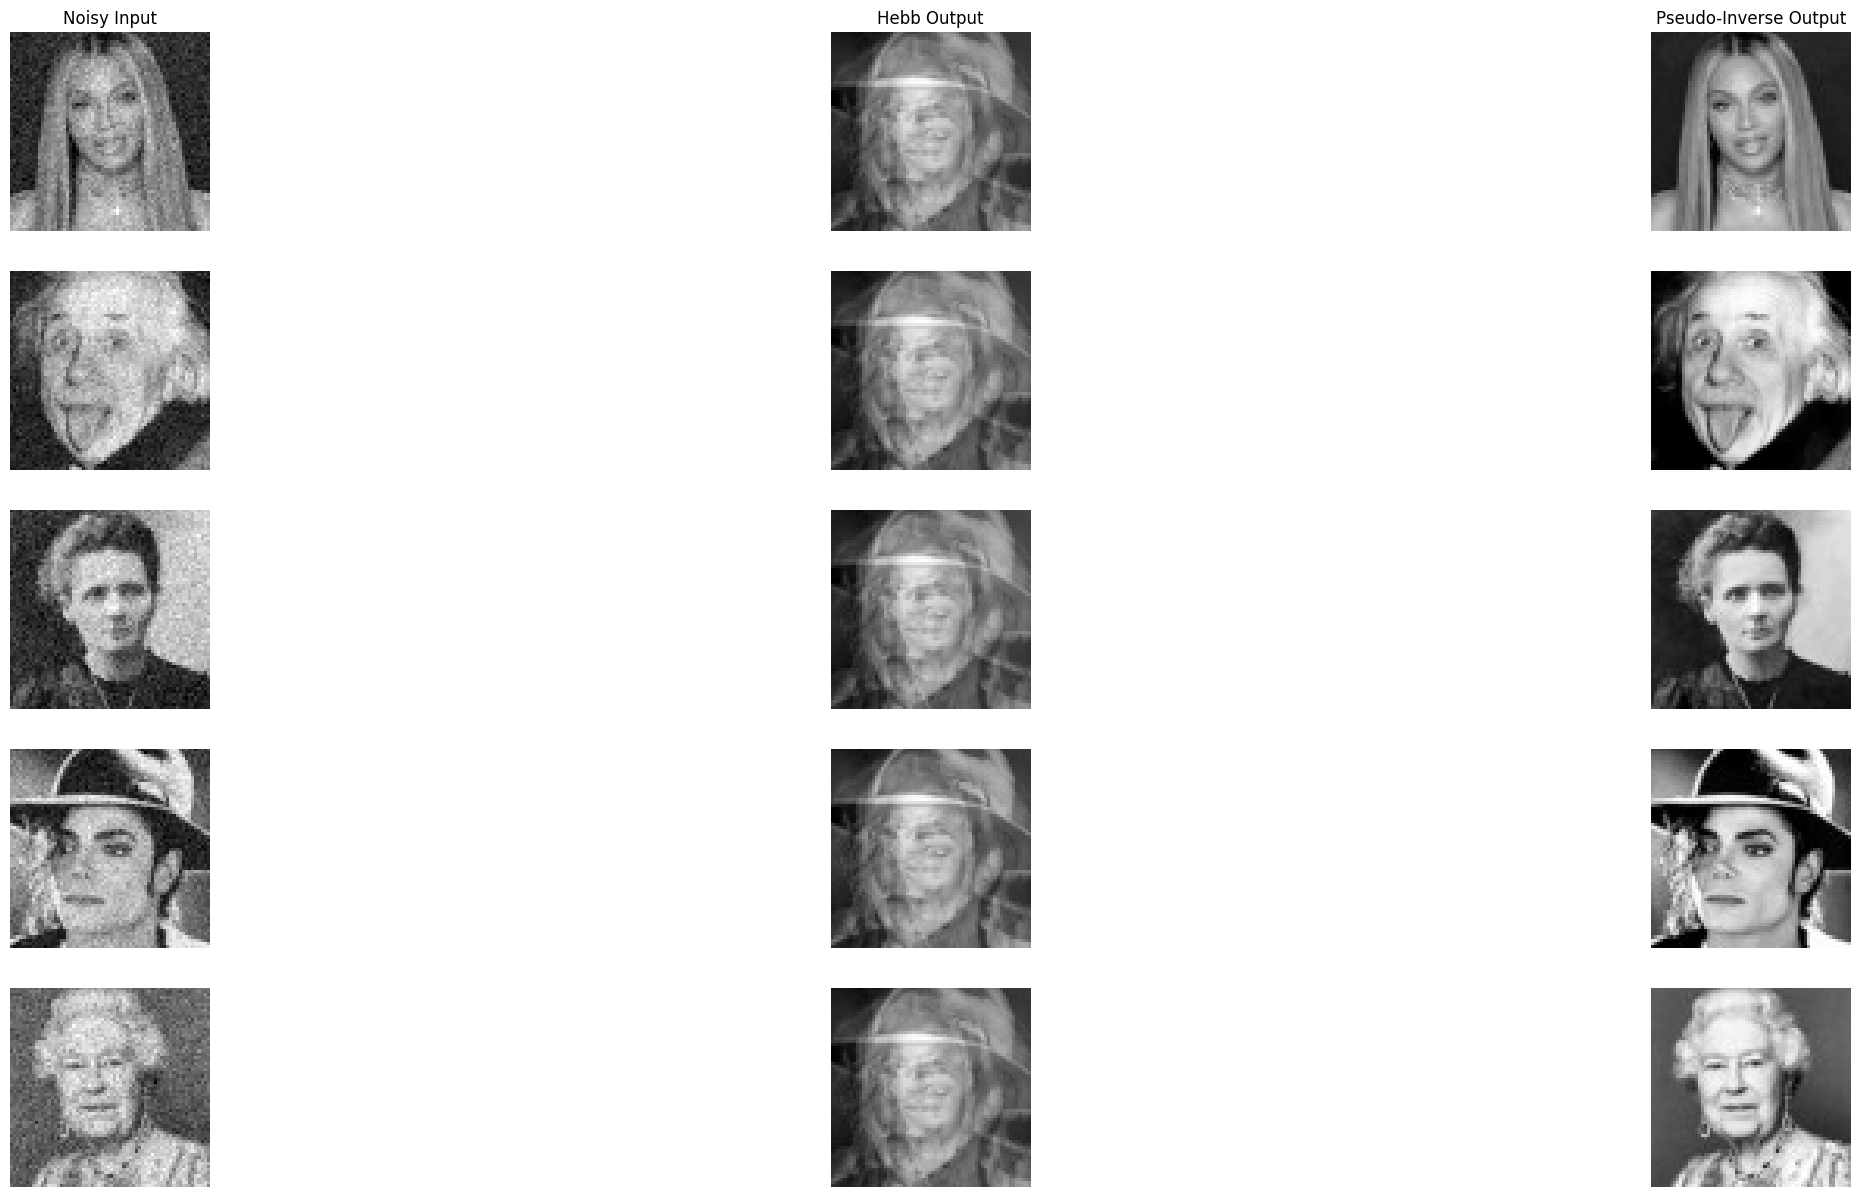

In [21]:
noisy_inputs = np.empty((len(images), 4096))
outputs_hebb = np.empty((len(images), 4096))
outputs_pseudo = np.empty((len(images), 4096))

# Create a figure and a set of subplots with 3 row and 3 columns
fig, axs = plt.subplots(5, 3, figsize=(30, 15))
axs[0][0].set_title("Noisy Input")
axs[0][1].set_title("Hebb Output")
axs[0][2].set_title("Pseudo-Inverse Output")

for index in range(0, len(inputs)):
    noisy_inputs[index] = awgn(inputs[index], 20).reshape(1, -1)
    outputs_hebb[index] = np.dot(weights_hebb, noisy_inputs[index])
    outputs_pseudo[index] = np.dot(weights_pseudo, noisy_inputs[index])

    axs[index][0].imshow(noisy_inputs[index].reshape(64,64), cmap='gray')
    axs[index][0].axis('off') # Hide axes ticks
    axs[index][1].imshow(outputs_hebb[index].reshape(64,64), cmap='gray')
    axs[index][1].axis('off') # Hide axes ticks
    axs[index][2].imshow(outputs_pseudo[index].reshape(64,64), cmap='gray')
    axs[index][2].axis('off') # Hide axes ticks

plt.show()

In [22]:
output_1_corr = [pearsonr(inputs[0], outputs_hebb[0])[0], pearsonr(inputs[1], outputs_hebb[0])[0], pearsonr(inputs[2], outputs_hebb[0])[0]]
output_2_corr = [pearsonr(inputs[0], outputs_hebb[1])[0], pearsonr(inputs[1], outputs_hebb[1])[0], pearsonr(inputs[2], outputs_hebb[1])[0]]
output_3_corr = [pearsonr(inputs[0], outputs_hebb[2])[0], pearsonr(inputs[1], outputs_hebb[2])[0], pearsonr(inputs[2], outputs_hebb[2])[0]]

data = {
    'Pattern': ['Pattern 1', 'Pattern 2', 'Pattern 3'],
    'Output 1': output_1_corr,
    'Output 2': output_2_corr,
    'Output 3': output_3_corr
}

df = pd.DataFrame(data)
print("Correlation between clean inputs and noisy Hebbian learning outputs")
print(df)

Correlation between clean inputs and noisy Hebbian learning outputs
     Pattern  Output 1  Output 2  Output 3
0  Pattern 1  0.583118  0.507851  0.485363
1  Pattern 2  0.724365  0.803887  0.757226
2  Pattern 3  0.441660  0.503014  0.575119


In [23]:
output_1_corr = [pearsonr(inputs[0], outputs_pseudo[0])[0], pearsonr(inputs[1], outputs_pseudo[0])[0], pearsonr(inputs[2], outputs_pseudo[0])[0]]
output_2_corr = [pearsonr(inputs[0], outputs_pseudo[1])[0], pearsonr(inputs[1], outputs_pseudo[1])[0], pearsonr(inputs[2], outputs_pseudo[1])[0]]
output_3_corr = [pearsonr(inputs[0], outputs_pseudo[2])[0], pearsonr(inputs[1], outputs_pseudo[2])[0], pearsonr(inputs[2], outputs_pseudo[2])[0]]

data = {
    'Pattern': ['Pattern 1', 'Pattern 2', 'Pattern 3'],
    'Output 1': output_1_corr,
    'Output 2': output_2_corr,
    'Output 3': output_3_corr
}

df = pd.DataFrame(data)
print("Correlation between clean inputs and noisy Pseudo-Inverse learning outputs")
print(df)

Correlation between clean inputs and noisy Pseudo-Inverse learning outputs
     Pattern  Output 1  Output 2  Output 3
0  Pattern 1  0.999965  0.224762 -0.070927
1  Pattern 2  0.231185  0.999995  0.363981
2  Pattern 3 -0.066091  0.360755  0.999985
